# Chap2. 이동평균필터 (Moving Average Filter)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 선형적인 모델의 데이터 추출 함수 
def get_linear(gredient,t,*offset):
    if offset != ():
        output = gredient*t + np.random.normal(0,1) + offset
        
    elif offset == ():
        output = gredient*t + np.random.normal(0,1)
    return output


In [23]:
class MovingAvgFilter:  # 객체 지향적 프로그래밍을 이용한 이동 평균 필터 구현
    def __init__(self,size):
        self.queue = []
        self.size = size
        
    def run(self,input):
        if len(self.queue) < self.size:
            self.queue.append(input)
            avg = np.mean(self.queue)
        else :
            self.queue.pop(0)
            self.queue.append(input)
            avg = np.mean(self.queue)
        return avg

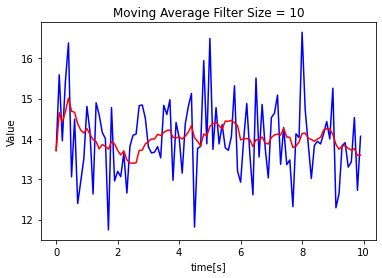

In [24]:
dt = 0.1
t = np.arange(0,10,dt) # 0에서 10초까지 dt 간격으로 데이터 생성
nSamples = np.zeros(t.shape)
size = 10

moving_avg = MovingAvgFilter(size) # 이동평균필터 객체 선언

AvgSaved = [] #Plot하기위한 리스트 선언

for i in range(t.shape[0]):
    
    nSamples[i] = get_linear(2,t[i],0.5)
    
    avg=moving_avg.run(nSamples[i])
    
    AvgSaved.append(avg)

plt.title("Moving Average Filter Size = {}".format(size))
plt.ylabel("Value")
plt.xlabel("time[s]")
plt.plot(t,nSamples,'blue')
plt.plot(t,AvgSaved,'red')   

## 아래와 같은 방법으로 구성하는 방법도 있다 (순차 지향)

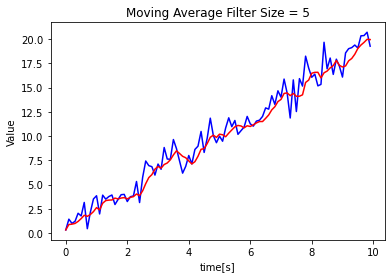

In [20]:
dt = 0.1
t = np.arange(0,10,dt) # 0에서 10초까지 dt 간격으로 데이터 생성
nSamples = np.zeros(t.shape) # 원래의 신호를 플로팅하기 위한 변수
size = 5

AvgSaved = [] #Plot하기위한 리스트 선언
queue = [] # 이동 평균 필터의 사이즈에 맞도록 Queue 자료 구조 이용

for i in range(t.shape[0]):
    
    nSamples[i] = get_linear(2,t[i],0.5)
    
    if len(queue) < size:
        queue.append(nSamples[i])
        avg = np.mean(queue)
        AvgSaved.append(avg)
        
    else :
        queue.pop(0)
        queue.append(nSamples[i])
        #print(len(queue))
        avg = np.mean(queue)
        AvgSaved.append(avg)

plt.title("Moving Average Filter Size = {}".format(size))
plt.ylabel("Value")
plt.xlabel("time[s]")
plt.plot(t,nSamples,'blue')
plt.plot(t,AvgSaved,'red')   